In [89]:
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import numpy as np

import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [90]:
import pandas as pd
file_path = 'wheather_data.csv'
reviews = pd.read_csv(file_path) 
#pd.set_option("display.max_rows", 8)
dataset = reviews.values
print(reviews)

             id            timestamp    value identifier  value_type_id  \
0        427436  2019-04-25 13:20:09  1021.80       PMSL             20   
1        427439  2019-04-25 13:20:09    12.00        TDP             15   
2        427434  2019-04-25 13:20:09     0.00        P6H             13   
3        427435  2019-04-25 13:20:09     0.51       P24H             14   
4        427440  2019-04-25 13:20:09     3.00        UVI             16   
...         ...                  ...      ...        ...            ...   
406714  6426613  2019-07-29 23:40:08    23.00          T             11   
406715  6426610  2019-07-29 23:40:08     0.00       P24H             14   
406716  6426611  2019-07-29 23:40:08  1007.10       PMSL             55   
406717  6426617  2019-07-29 23:40:08     0.00         WS             18   
406718  6426596  2019-07-29 23:40:08   310.00         WD             17   

        location_id  source_id  
0              23.0          5  
1              23.0          5  


In [91]:
reviews.describe()

,id,value,value_type_id,location_id,source_id
count,4.067190e+05,406719.000000,406719.000000,406719.000000,406719.000000
mean,4.678257e+06,153.453020,35.833573,38.873038,5.744032
std,1.880498e+06,321.899409,15.033063,30.817378,1.662299
min,4.274330e+05,-0.019000,11.000000,23.000000,5.000000
25%,3.275172e+06,0.000000,21.000000,23.000000,5.000000
50%,5.746641e+06,13.450000,39.000000,27.000000,5.000000
75%,6.082960e+06,63.000000,43.000000,30.000000,5.000000
max,6.426617e+06,1021.900000,66.000000,152.000000,10.000000


In [92]:
reviews.groupby(['value_type_id' , 'identifier']).value.agg([len, min, max]) #len=freq

,,len,min,max
value_type_id,identifier,,,
11,T,10443,6.000,39.000
12,P1H,10443,0.000,3.560
13,P6H,10444,0.000,15.750
14,P24H,10443,0.000,27.180
15,TDP,10444,4.000,21.000
16,UVI,10439,0.000,10.000
17,WD,10439,0.000,350.000
18,WS,10442,0.000,12.000
19,RH,10441,14.000,100.000


In [93]:
reviews.groupby(['timestamp']).value.agg([len, min, max])

,len,min,max
timestamp,,,
2019-04-25 13:20:09,10,0.00,1021.8
2019-04-25 13:40:09,10,0.00,1021.6
2019-04-25 14:00:11,10,0.00,1021.9
2019-04-25 14:20:10,10,0.25,1021.8
2019-04-25 14:40:09,10,0.25,1021.6
...,...,...,...
2019-07-29 23:32:04,6,2.10,1003.0
2019-07-29 23:33:09,6,0.00,1007.0
2019-07-29 23:40:06,18,0.00,1007.7


In [94]:
reviews.groupby(['value_type_id' , 'location_id']).value.agg([len, min, max])

len    min    max
value_type_id location_id                    
11            23.0         5015   6.00  38.00
              27.0         2187  14.00  38.00
              30.0         1908  18.00  39.00
              116.0        1332  16.00  37.00
              152.0           1  30.00  30.00
...                         ...    ...    ...
66            23.0         1316   4.23  19.15
              27.0         1305   4.40  19.31
              30.0         1305   4.32  17.64
              116.0        1305   8.26  21.70
              152.0           1  11.12  11.12

[207 rows x 3 columns]

In [95]:
std_time = reviews.groupby(['timestamp']).std()
print(std_time)

                            id       value  value_type_id  location_id  \
timestamp                                                                
2019-04-25 13:20:09   3.027650  318.124190       3.027650     0.000000   
2019-04-25 13:40:09   3.027650  318.212858       3.027650     0.000000   
2019-04-25 14:00:11   3.027650  317.946463       3.027650     0.000000   
2019-04-25 14:20:10   3.027650  317.913658       3.027650     0.000000   
2019-04-25 14:40:09   3.027650  317.735325       3.027650     0.000000   
...                        ...         ...            ...          ...   
2019-07-29 23:32:04   1.870829  379.807386       2.160247     0.000000   
2019-07-29 23:33:09   1.870829  382.121622       2.160247     0.000000   
2019-07-29 23:40:06   7.792446  320.257408      23.640831     0.000000   
2019-07-29 23:40:07  16.153269  320.476608      19.165345     2.175322   
2019-07-29 23:40:08   8.381363  271.083035      10.823255    40.317422   

                     source_id  
time

In [96]:
std_time.loc[(std_time.value >=200)] #display timestamp with value std>=200

,id,value,value_type_id,location_id,source_id
timestamp,,,,,
2019-04-25 13:20:09,3.027650,318.124190,3.027650,0.000000,0.000000
2019-04-25 13:40:09,3.027650,318.212858,3.027650,0.000000,0.000000
2019-04-25 14:00:11,3.027650,317.946463,3.027650,0.000000,0.000000
2019-04-25 14:20:10,3.027650,317.913658,3.027650,0.000000,0.000000
2019-04-25 14:40:09,3.027650,317.735325,3.027650,0.000000,0.000000
...,...,...,...,...,...
2019-07-29 23:32:04,1.870829,379.807386,2.160247,0.000000,0.000000
2019-07-29 23:33:09,1.870829,382.121622,2.160247,0.000000,0.000000
2019-07-29 23:40:06,7.792446,320.257408,23.640831,0.000000,2.556550


In [97]:
std_valuetype = reviews.groupby(['value_type_id']).std()
print(std_valuetype)

                         id       value  location_id  source_id
value_type_id                                                  
11             2.445073e+06    6.665105    30.354744        0.0
12             2.445071e+06    0.201922    30.335273        0.0
13             2.445002e+06    1.114422    30.333746        0.0
14             2.445073e+06    3.216783    30.344739        0.0
15             2.445005e+06    3.018331    30.353448        0.0
16             2.445342e+06    3.273358    30.349933        0.0
17             2.445343e+06  106.206766    30.349933        0.0
18             2.445140e+06    1.705706    30.346267        0.0
19             2.445207e+06   19.079573    30.337794        0.0
20             2.366482e+05    3.166150     1.519137        0.0
21             1.235057e+06    4.317548    34.684429        0.0
22             1.346449e+06    1.273707    31.493823        0.0
23             1.183843e+06   21.979968    34.767287        0.0
24             1.217162e+06  117.277088 

In [98]:
std_valuetype.loc[(std_valuetype.value >=10)]


,id,value,location_id,source_id
value_type_id,,,,
17,2.445343e+06,106.206766,30.349933,0.0
19,2.445207e+06,19.079573,30.337794,0.0
23,1.183843e+06,21.979968,34.767287,0.0
24,1.217162e+06,117.277088,34.823546,0.0
26,1.235056e+06,19.580935,34.694650,0.0
41,1.597625e+06,125.977162,27.148744,0.0
43,1.597622e+06,15.901633,27.148744,0.0
61,1.341217e+05,117.470826,38.765821,0.0


In [99]:
std_location = reviews.groupby(['location_id']).std()
print(std_location)

                       id       value  value_type_id  source_id
location_id                                                    
23.0         2.290820e+06  317.690477      15.775669   1.525283
27.0         1.667956e+06  322.222222      14.818306   1.692937
30.0         1.598727e+06  325.969168      12.615912   1.507562
116.0        2.165223e+05  321.225138      16.906891   2.071385
152.0        5.138349e+01  312.315021      23.635110   2.564946


In [100]:
#reviews.to_numpy()
y = reviews.value.loc[1:]
y = np.array(y)
#y = y.reshape(-1,1)


df_features = ['location_id', 'value_type_id', 'value']
X = reviews[df_features]
X = X.iloc[:-1]
#X = X.values


print(X)
print(y)
type(y)


        location_id  value_type_id    value
0              23.0             20  1021.80
1              23.0             15    12.00
2              23.0             13     0.00
3              23.0             14     0.51
4              23.0             16     3.00
...             ...            ...      ...
406713        116.0             12     0.00
406714        116.0             11    23.00
406715        116.0             14     0.00
406716        116.0             55  1007.10
406717        116.0             18     0.00

[406718 rows x 3 columns]
[1.2000e+01 0.0000e+00 5.1000e-01 ... 1.0071e+03 0.0000e+00 3.1000e+02]


numpy.ndarray

In [114]:
scaler = MinMaxScaler()
X_scale= scaler.fit_transform(X) 
print(X_scale)



[[0.00000000e+00 1.63636364e-01 9.99902145e-01]
 [0.00000000e+00 7.27272727e-02 1.17612061e-02]
 [0.00000000e+00 3.63636364e-02 1.85924716e-05]
 ...
 [7.20930233e-01 5.45454545e-02 1.85924716e-05]
 [7.20930233e-01 8.00000000e-01 9.85517443e-01]
 [7.20930233e-01 1.27272727e-01 1.85924716e-05]]


In [115]:
y_scale= scaler.fit_transform(y.reshape(-1, 1))
print(y_scale)


[[1.17612061e-02]
 [1.85924716e-05]
 [5.17653552e-04]
 ...
 [9.85517443e-01]
 [1.85924716e-05]
 [3.03369445e-01]]


In [103]:
#split_date = reviews.timestamp('1989-11-03')
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y_scale, test_size=0.3, shuffle=True)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, shuffle=True)

In [104]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)
type(X_train)

(284702, 3) (61008, 3) (61008, 3) (284702, 1) (61008, 1) (61008, 1)


numpy.ndarray

In [105]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(3,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [106]:
opt = tensorflow.keras.optimizers.SGD(learning_rate=0.001)

In [107]:
model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['mse'])

In [108]:
hist = model.fit(X_train, Y_train, 
          batch_size=500, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
570/570 [==============================] - 1s 1ms/step - loss: 0.1643 - mse: 0.1643 - val_loss: 0.1508 - val_mse: 0.1508
Epoch 2/100
570/570 [==============================] - 1s 1ms/step - loss: 0.1400 - mse: 0.1400 - val_loss: 0.1320 - val_mse: 0.1320
Epoch 3/100
570/570 [==============================] - 1s 1ms/step - loss: 0.1250 - mse: 0.1250 - val_loss: 0.1207 - val_mse: 0.1207
Epoch 4/100
570/570 [==============================] - 1s 1ms/step - loss: 0.1160 - mse: 0.1160 - val_loss: 0.1138 - val_mse: 0.1138
Epoch 5/100
570/570 [==============================] - 1s 1ms/step - loss: 0.1105 - mse: 0.1105 - val_loss: 0.1095 - val_mse: 0.1095
Epoch 6/100
570/570 [==============================] - 1s 1ms/step - loss: 0.1069 - mse: 0.1069 - val_loss: 0.1067 - val_mse: 0.1067
Epoch 7/100
570/570 [==============================] - 1s 1ms/step - loss: 0.1047 - mse: 0.1047 - val_loss: 0.1050 - val_mse: 0.1050
Epoch 8/100
570/570 [==============================] - 1s 1ms/step - 

Epoch 62/100
570/570 [==============================] - 1s 1ms/step - loss: 0.0994 - mse: 0.0994 - val_loss: 0.1007 - val_mse: 0.1007
Epoch 63/100
570/570 [==============================] - 1s 1ms/step - loss: 0.0994 - mse: 0.0994 - val_loss: 0.1007 - val_mse: 0.1007
Epoch 64/100
570/570 [==============================] - 1s 1ms/step - loss: 0.0994 - mse: 0.0994 - val_loss: 0.1007 - val_mse: 0.1007
Epoch 65/100
570/570 [==============================] - 1s 1ms/step - loss: 0.0994 - mse: 0.0994 - val_loss: 0.1007 - val_mse: 0.1007
Epoch 66/100
570/570 [==============================] - 1s 1ms/step - loss: 0.0994 - mse: 0.0994 - val_loss: 0.1006 - val_mse: 0.1006
Epoch 67/100
570/570 [==============================] - 1s 1ms/step - loss: 0.0994 - mse: 0.0994 - val_loss: 0.1006 - val_mse: 0.1006
Epoch 68/100
570/570 [==============================] - 1s 1ms/step - loss: 0.0994 - mse: 0.0994 - val_loss: 0.1006 - val_mse: 0.1006
Epoch 69/100
570/570 [==============================] - 1s 1ms

In [109]:
model.evaluate(X_test, Y_test)[1] #[loss][accuracy]


1907/1907 [==============================] - 1s 750us/step - loss: 0.0987 - mse: 0.0987


0.09874062240123749

In [113]:
predictions = model.predict(X_test)
print(predictions)


[[0.12718877]
 [0.18940932]
 [0.16809759]
 ...
 [0.12174758]
 [0.15188533]
 [0.1933988 ]]


In [123]:
unscaled_predictions = scaler.inverse_transform(predictions)
#plt.plot(unscaled_predictions)
print(unscaled_predictions)
print(unscaled_predictions.shape)

[[129.95761]
 [193.54198]
 [171.7631 ]
 ...
 [124.39717]
 [155.1955 ]
 [197.61891]]
(61008, 1)


In [66]:
import xgboost
import shap

In [50]:
model = xgboost.XGBRegressor().fit(X_scale, y_scale)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


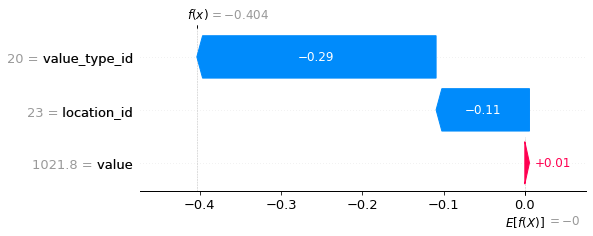

In [51]:
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0]) #pros ta pou wthei to output i kathe metavliti